**MONTAGGIO GOOGLE DRIVE**

In [1]:
from keras.layers import Input,Conv2D,MaxPool2D,Dense,Dropout,Concatenate,Lambda,GlobalMaxPool2D
import tensorflow as tf
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LambdaCallback
from PIL import ImageStat,Image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np


Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/compito/')

**APERTURA DATASET**

In [4]:
import h5py
import numpy as np
from sklearn.utils import shuffle



f=h5py.File('dataset.h5', 'r')
X1 = f['data1']
X2= f['data2']
y = f['label']

print(X1.shape,X2.shape,y.shape)

(44999, 192, 192, 3) (44999, 192, 192, 3) (44999, 3)


**GENERATORE**

In [0]:
def gen(batch_size=32):
  i=0
 
  while i <= int(40000/batch_size):
    if i == int(40000/batch_size):
      i=0;
    if i == int(40000/batch_size) - 1 and  40000%batch_size !=0:
      val1 = X1[i*batch_size:]
      val2 = X2[i*batch_size:]
      label = y[i*batch_size:]
      out1 = np.flip(np.array(val1)/255.0,axis=3)
      out2 = np.flip(np.array(val2)/255.0,axis=3)
      i+=1;
      yield [out1.astype('float32'),out2.astype('float32')],label.astype('float32')
    else:
   
      val1 = X1[i*batch_size:(i+1)*batch_size]
      val2 = X2[i*batch_size:(i+1)*batch_size]
      label = y[i*batch_size:(i+1)*batch_size]
      out1 = np.flip(np.array(val1)/255.0,axis=3)
      out2 = np.flip(np.array(val2)/255.0,axis=3)
      i+=1;
      yield [out1.astype('float32'),out2.astype('float32')],label.astype('float32')


def val(batch_size=32,resize=False):
  def resize_func(img):
      if resize:
        img = cv2.resize(img,(224,224))
        return img
      else:
        return img
  i=0
  while i <= int(4999/batch_size):
    
    if i == int(4999/batch_size):
      i=0;
    if i == int(4999/batch_size) - 1 and  4999%batch_size !=0:
      val1 = X1[40000+i*batch_size:]
      val2 = X2[40000+i*batch_size:]
      label = y[40000+i*batch_size:]
      out1 = np.flip(np.array(val1)/255.0,axis=3)
      out2 = np.flip(np.array(val2)/255.0,axis=3)
      
    else:
   
      val1 = X1[40000+i*batch_size:40000+(i+1)*batch_size]
      val2 = X2[40000+i*batch_size:40000+(i+1)*batch_size]
      label = y[40000+i*batch_size:40000+(i+1)*batch_size]
      out1 = np.flip(np.array(val1)/255.0,axis=3)
      out2 = np.flip(np.array(val2)/255.0,axis=3)

    i+=1;
    out1R=[]
    out2R=[]
    for l in range(len(out1)):
      out1R.append(resize_func(out1[l]))
      out2R.append(resize_func(out2[l]))
    out1R = np.array(out1R)
    out2R = np.array(out2R)
  
    yield [out1R.astype('float32'),out2R.astype('float32')],label.astype('float32')

**SHOW IMAGE**

In [0]:
from PIL import Image
from IPython.display import display


def show_image(arr):
  imdata=arr.astype('uint8')
  #
  img=Image.fromarray(imdata)
  display(img)

**TEST GENERATORE**

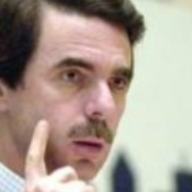

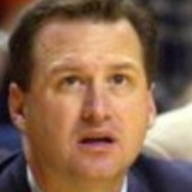

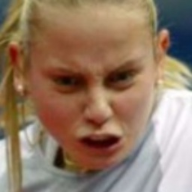

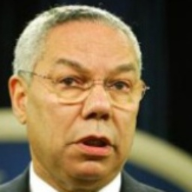

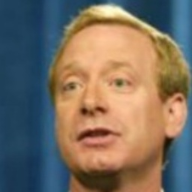

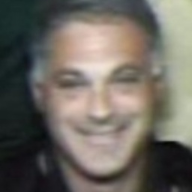

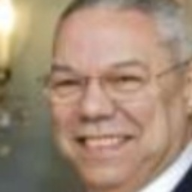

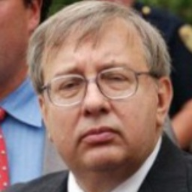

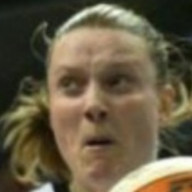

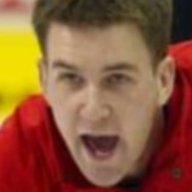

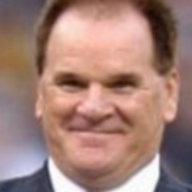

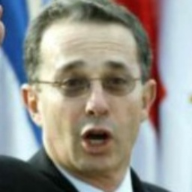

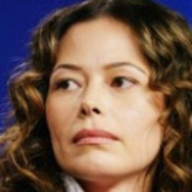

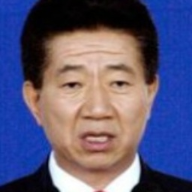

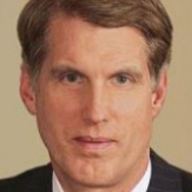

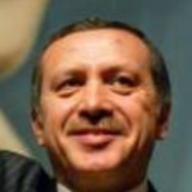

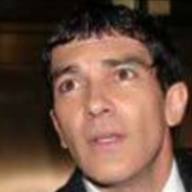

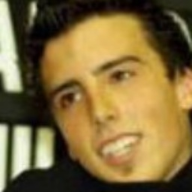

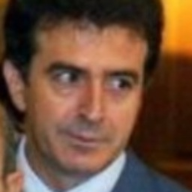

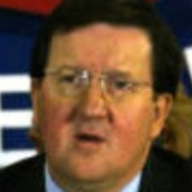

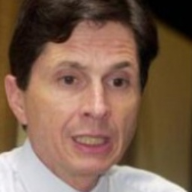

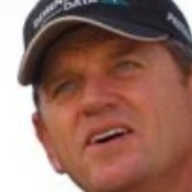

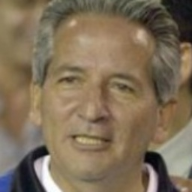

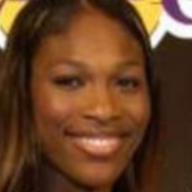

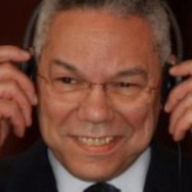

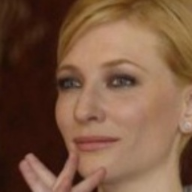

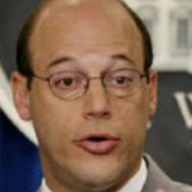

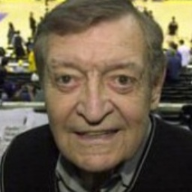

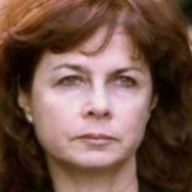

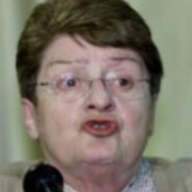

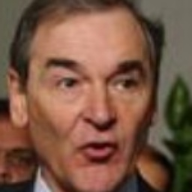

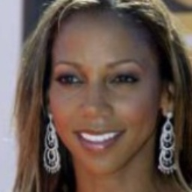

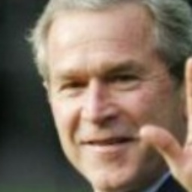

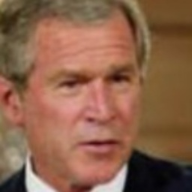

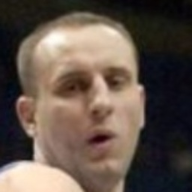

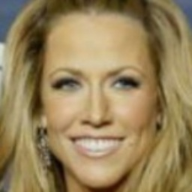

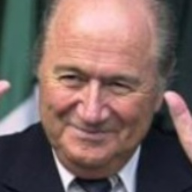

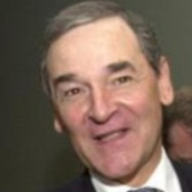

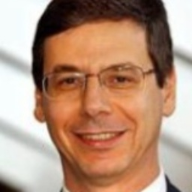

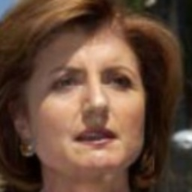

In [0]:
for train,label in gen(40):
  for img in train[0]:
    show_image(img*255)
  break

**NETWORK**

In [8]:
input_b=Input((192,192,3))
net = Lambda(lambda x: tf.image.rgb_to_grayscale(x))(input_b)
net = Conv2D(64,kernel_size=(3,3),strides=(2,2),activation='relu')(net)
net = Conv2D(64,kernel_size=(3,3),strides=(2,2),activation='relu')(net)
net = Conv2D(128,kernel_size=(3,3),strides=(2,2),activation='relu')(net)
net = Conv2D(128,kernel_size=(3,3),strides=(2,2),activation='relu')(net)
net= Dropout(0.2)(net)
net= MaxPool2D((2,2),strides=(2,2))(net)
net = Conv2D(256,kernel_size=(3,3),activation='relu')(net)
net = Conv2D(512,kernel_size=(3,3),activation='relu')(net)
net= GlobalMaxPool2D()(net)

out = Dropout(0.1)(net)
out = Dense(2048,activation='relu')(out)
out= Dropout(0.2)(out)
out = Dense(1024,activation='relu')(out)
out= Dropout(0.3)(out)
out = Dense(512,activation='relu')(out)

model = Model(input=input_b ,output=out)
model.summary()



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 192, 192, 3)       0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 192, 192, 1)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 95, 95, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 128)       147584    
________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [9]:
input_1 = Input((192,192,3))
input_2 = Input((192,192,3))

x1 = model(input_1)
x2 = model(input_2) 

x = Concatenate(axis=-1)([x1,x2])
x = Dropout(0.1)(x)
x = Dense(2048, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
classification = Dense(3, activation="softmax")(x)



model2 = Model([input_1,input_2], classification)
model2.summary()

model2.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['acc'])

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 192, 192, 3)  0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 192, 192, 3)  0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 512)          5407936     input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 1024)         0           model_1[1][0]              

In [10]:
callbacks = [EarlyStopping(monitor='val_loss', mode='min', patience=5,
                           min_delta=0.002, verbose=True),
             ModelCheckpoint(filepath='pesi_droputlevels_augmentation.h5',
                             monitor='val_loss', mode='min', save_best_only=True),
             ReduceLROnPlateau(monitor='val_loss', mode='min', patience=2,
                                min_delta=0.005, factor=0.1, verbose=True)]

sample = int(len(y)/3) 
trainingn = sample - int(sample*0.2)
validationn = sample - trainingn

history = model2.fit_generator(
        
            gen(40),
            
            steps_per_epoch=1000,
            validation_data= val(40),
            validation_steps = 124, 
            verbose = True,
            epochs = 100,
            callbacks = callbacks,
            shuffle=False
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1000/1000 [==============================] - 237s 237ms/step - loss: 0.9402 - acc: 0.5320 - val_loss: 0.8391 - val_acc: 0.6077
Epoch 2/100
 498/1000 [=============>................] - ETA: 2:00 - loss: 0.8090 - acc: 0.6255

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104305). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 608/1000 [=================>............] - ETA: 1:34 - loss: 0.8016 - acc: 0.6279

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104156). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 610/1000 [=================>............] - ETA: 1:34 - loss: 0.8015 - acc: 0.6281

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105374). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 861/1000 [========================>.....] - ETA: 33s - loss: 0.7867 - acc: 0.6370

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104707). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 941/1000 [===========================>..] - ETA: 14s - loss: 0.7780 - acc: 0.6413

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103968). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 273s 273ms/step - loss: 0.7749 - acc: 0.6426 - val_loss: 0.7017 - val_acc: 0.6749
Epoch 3/100
  19/1000 [..............................] - ETA: 3:29 - loss: 0.6886 - acc: 0.7066

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100733). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 498/1000 [=============>................] - ETA: 2:02 - loss: 0.6851 - acc: 0.6910

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100556). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 685/1000 [===================>..........] - ETA: 1:16 - loss: 0.6733 - acc: 0.6959

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101430). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 686/1000 [===================>..........] - ETA: 1:16 - loss: 0.6734 - acc: 0.6958

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104420). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.6528 - acc: 0.7067 - val_loss: 0.5806 - val_acc: 0.7311
Epoch 4/100
   2/1000 [..............................] - ETA: 4:29 - loss: 0.5955 - acc: 0.7625

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.108115). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 463/1000 [============>.................] - ETA: 2:11 - loss: 0.5797 - acc: 0.7395

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101515). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 465/1000 [============>.................] - ETA: 2:10 - loss: 0.5798 - acc: 0.7392

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103122). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 557/1000 [===============>..............] - ETA: 1:48 - loss: 0.5762 - acc: 0.7418

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100587). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 592/1000 [================>.............] - ETA: 1:39 - loss: 0.5733 - acc: 0.7429

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.107618). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 685/1000 [===================>..........] - ETA: 1:16 - loss: 0.5703 - acc: 0.7451

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104166). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 782/1000 [======================>.......] - ETA: 53s - loss: 0.5668 - acc: 0.7471

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102948). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 946/1000 [===========================>..] - ETA: 13s - loss: 0.5579 - acc: 0.7518

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104764). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105782). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 989/1000 [============================>.] - ETA: 2s - loss: 0.5562 - acc: 0.7529

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105218). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.5560 - acc: 0.7527 - val_loss: 0.4898 - val_acc: 0.7742
Epoch 5/100
 276/1000 [=======>......................] - ETA: 2:57 - loss: 0.5149 - acc: 0.7707

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105564). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 456/1000 [============>.................] - ETA: 2:13 - loss: 0.5057 - acc: 0.7774

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101864). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 552/1000 [===============>..............] - ETA: 1:49 - loss: 0.5010 - acc: 0.7800

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103691). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 557/1000 [===============>..............] - ETA: 1:48 - loss: 0.5013 - acc: 0.7798

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105120). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 861/1000 [========================>.....] - ETA: 33s - loss: 0.4911 - acc: 0.7837

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101143). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 882/1000 [=========================>....] - ETA: 28s - loss: 0.4895 - acc: 0.7846

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100553). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103292). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 884/1000 [=========================>....] - ETA: 28s - loss: 0.4891 - acc: 0.7847

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101705). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 901/1000 [==========================>...] - ETA: 24s - loss: 0.4882 - acc: 0.7851

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103128). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 906/1000 [==========================>...] - ETA: 22s - loss: 0.4879 - acc: 0.7853

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102204). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 917/1000 [==========================>...] - ETA: 20s - loss: 0.4871 - acc: 0.7853

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104609). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 983/1000 [============================>.] - ETA: 4s - loss: 0.4848 - acc: 0.7862

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105732). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.4846 - acc: 0.7861 - val_loss: 0.4370 - val_acc: 0.8094
Epoch 6/100
 215/1000 [=====>........................] - ETA: 3:11 - loss: 0.4550 - acc: 0.8012

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101628). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 217/1000 [=====>........................] - ETA: 3:11 - loss: 0.4548 - acc: 0.8010

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101901). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 246/1000 [======>.......................] - ETA: 3:03 - loss: 0.4547 - acc: 0.8000

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.108973). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 250/1000 [======>.......................] - ETA: 3:03 - loss: 0.4555 - acc: 0.7996

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104332). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 252/1000 [======>.......................] - ETA: 3:02 - loss: 0.4559 - acc: 0.7996

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101162). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 419/1000 [===========>..................] - ETA: 2:21 - loss: 0.4550 - acc: 0.7999

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103672). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 420/1000 [===========>..................] - ETA: 2:21 - loss: 0.4546 - acc: 0.8002

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105571). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 422/1000 [===========>..................] - ETA: 2:21 - loss: 0.4545 - acc: 0.8002

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.107282). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 425/1000 [===========>..................] - ETA: 2:20 - loss: 0.4542 - acc: 0.8004

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105597). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 430/1000 [===========>..................] - ETA: 2:19 - loss: 0.4542 - acc: 0.8002

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101534). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 475/1000 [=============>................] - ETA: 2:08 - loss: 0.4516 - acc: 0.8012

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101921). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 623/1000 [=================>............] - ETA: 1:32 - loss: 0.4453 - acc: 0.8044

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102447). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 665/1000 [==================>...........] - ETA: 1:21 - loss: 0.4445 - acc: 0.8047

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103830). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 949/1000 [===========================>..] - ETA: 12s - loss: 0.4378 - acc: 0.8084

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101214). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.4373 - acc: 0.8088 - val_loss: 0.4027 - val_acc: 0.8208
Epoch 7/100
  50/1000 [>.............................] - ETA: 3:51 - loss: 0.4309 - acc: 0.8010

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100126). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


  54/1000 [>.............................] - ETA: 3:53 - loss: 0.4284 - acc: 0.8032

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102034). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


  68/1000 [=>............................] - ETA: 3:47 - loss: 0.4206 - acc: 0.8070

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100652). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 240/1000 [======>.......................] - ETA: 3:05 - loss: 0.4115 - acc: 0.8180

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102170). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 326/1000 [========>.....................] - ETA: 2:44 - loss: 0.4176 - acc: 0.8142

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106096). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 702/1000 [====================>.........] - ETA: 1:12 - loss: 0.4022 - acc: 0.8239

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104665). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 734/1000 [=====================>........] - ETA: 1:04 - loss: 0.4016 - acc: 0.8242

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104694). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 737/1000 [=====================>........] - ETA: 1:04 - loss: 0.4018 - acc: 0.8240

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103168). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 742/1000 [=====================>........] - ETA: 1:03 - loss: 0.4016 - acc: 0.8242

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101974). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 818/1000 [=======================>......] - ETA: 44s - loss: 0.3998 - acc: 0.8255

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103302). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 902/1000 [==========================>...] - ETA: 23s - loss: 0.3974 - acc: 0.8271

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100157). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 905/1000 [==========================>...] - ETA: 23s - loss: 0.3971 - acc: 0.8272

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101398). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 990/1000 [============================>.] - ETA: 2s - loss: 0.3952 - acc: 0.8285

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102787). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.3954 - acc: 0.8281 - val_loss: 0.3721 - val_acc: 0.8390
Epoch 8/100
  34/1000 [>.............................] - ETA: 3:46 - loss: 0.3845 - acc: 0.8294

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101358). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


  40/1000 [>.............................] - ETA: 3:47 - loss: 0.3847 - acc: 0.8294

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102220). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 107/1000 [==>...........................] - ETA: 3:36 - loss: 0.3760 - acc: 0.8348

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104745). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 125/1000 [==>...........................] - ETA: 3:31 - loss: 0.3759 - acc: 0.8348

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104256). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 127/1000 [==>...........................] - ETA: 3:31 - loss: 0.3772 - acc: 0.8346

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103445). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 129/1000 [==>...........................] - ETA: 3:31 - loss: 0.3762 - acc: 0.8357

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106509). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105082). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 133/1000 [==>...........................] - ETA: 3:29 - loss: 0.3784 - acc: 0.8348

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102580). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 138/1000 [===>..........................] - ETA: 3:29 - loss: 0.3797 - acc: 0.8350

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101769). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 144/1000 [===>..........................] - ETA: 3:27 - loss: 0.3796 - acc: 0.8347

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103099). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 147/1000 [===>..........................] - ETA: 3:27 - loss: 0.3796 - acc: 0.8340

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102931). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 206/1000 [=====>........................] - ETA: 3:13 - loss: 0.3764 - acc: 0.8358

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104306). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 208/1000 [=====>........................] - ETA: 3:12 - loss: 0.3775 - acc: 0.8352

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106427). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 212/1000 [=====>........................] - ETA: 3:11 - loss: 0.3778 - acc: 0.8354

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105773). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 881/1000 [=========================>....] - ETA: 29s - loss: 0.3646 - acc: 0.8420

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101241). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 975/1000 [============================>.] - ETA: 6s - loss: 0.3620 - acc: 0.8429

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105601). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 980/1000 [============================>.] - ETA: 4s - loss: 0.3621 - acc: 0.8429

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101377). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 274s 274ms/step - loss: 0.3624 - acc: 0.8428 - val_loss: 0.3447 - val_acc: 0.8518
Epoch 9/100
 138/1000 [===>..........................] - ETA: 3:30 - loss: 0.3460 - acc: 0.8529

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103229). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 141/1000 [===>..........................] - ETA: 3:29 - loss: 0.3479 - acc: 0.8514

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105605). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 346/1000 [=========>....................] - ETA: 2:39 - loss: 0.3506 - acc: 0.8499

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106740). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 349/1000 [=========>....................] - ETA: 2:38 - loss: 0.3507 - acc: 0.8496

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103480). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 350/1000 [=========>....................] - ETA: 2:38 - loss: 0.3505 - acc: 0.8498

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103611). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 393/1000 [==========>...................] - ETA: 2:28 - loss: 0.3503 - acc: 0.8499

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.107326). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 395/1000 [==========>...................] - ETA: 2:27 - loss: 0.3504 - acc: 0.8498

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.107758). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 398/1000 [==========>...................] - ETA: 2:27 - loss: 0.3506 - acc: 0.8501

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.107086). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 805/1000 [=======================>......] - ETA: 47s - loss: 0.3422 - acc: 0.8531

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.110118). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.3399 - acc: 0.8541 - val_loss: 0.3461 - val_acc: 0.8466
Epoch 10/100
 223/1000 [=====>........................] - ETA: 3:10 - loss: 0.3290 - acc: 0.8577

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101763). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 493/1000 [=============>................] - ETA: 2:04 - loss: 0.3274 - acc: 0.8579

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101449). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.3198 - acc: 0.8619 - val_loss: 0.3265 - val_acc: 0.8522
Epoch 11/100
  40/1000 [>.............................] - ETA: 3:53 - loss: 0.3080 - acc: 0.8637

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103959). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


  44/1000 [>.............................] - ETA: 3:53 - loss: 0.3019 - acc: 0.8653

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101773). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 125/1000 [==>...........................] - ETA: 3:33 - loss: 0.3067 - acc: 0.8680

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103064). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 271/1000 [=======>......................] - ETA: 2:57 - loss: 0.3115 - acc: 0.8650

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106956). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 583/1000 [================>.............] - ETA: 1:41 - loss: 0.3084 - acc: 0.8666

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103805). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 703/1000 [====================>.........] - ETA: 1:12 - loss: 0.3066 - acc: 0.8687

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103476). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 707/1000 [====================>.........] - ETA: 1:11 - loss: 0.3067 - acc: 0.8687

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106806). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 853/1000 [========================>.....] - ETA: 35s - loss: 0.3037 - acc: 0.8700

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102483). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.3013 - acc: 0.8710 - val_loss: 0.3131 - val_acc: 0.8640
Epoch 12/100
  87/1000 [=>............................] - ETA: 3:45 - loss: 0.2887 - acc: 0.8730

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101337). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


  88/1000 [=>............................] - ETA: 3:45 - loss: 0.2891 - acc: 0.8730

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102790). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 291/1000 [=======>......................] - ETA: 2:53 - loss: 0.2887 - acc: 0.8756

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102383). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 340/1000 [=========>....................] - ETA: 2:41 - loss: 0.2878 - acc: 0.8756

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102124). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102506). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 341/1000 [=========>....................] - ETA: 2:41 - loss: 0.2875 - acc: 0.8758

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104167). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 894/1000 [=========================>....] - ETA: 25s - loss: 0.2827 - acc: 0.8799

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106565). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 895/1000 [=========================>....] - ETA: 25s - loss: 0.2826 - acc: 0.8800

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106236). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 899/1000 [=========================>....] - ETA: 24s - loss: 0.2824 - acc: 0.8801

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102889). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.2817 - acc: 0.8806 - val_loss: 0.3057 - val_acc: 0.8640
Epoch 13/100
 317/1000 [========>.....................] - ETA: 2:46 - loss: 0.2715 - acc: 0.8826

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101025). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 603/1000 [=================>............] - ETA: 1:36 - loss: 0.2696 - acc: 0.8844

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101667). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 608/1000 [=================>............] - ETA: 1:35 - loss: 0.2699 - acc: 0.8843

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100408). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 761/1000 [=====================>........] - ETA: 58s - loss: 0.2691 - acc: 0.8858

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100728). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.2687 - acc: 0.8862 - val_loss: 0.2860 - val_acc: 0.8760
Epoch 14/100
 245/1000 [======>.......................] - ETA: 3:04 - loss: 0.2621 - acc: 0.8897

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102432). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 247/1000 [======>.......................] - ETA: 3:04 - loss: 0.2622 - acc: 0.8899

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100637). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 249/1000 [======>.......................] - ETA: 3:03 - loss: 0.2618 - acc: 0.8902

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104037). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 251/1000 [======>.......................] - ETA: 3:03 - loss: 0.2622 - acc: 0.8899

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105595). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 313/1000 [========>.....................] - ETA: 2:48 - loss: 0.2591 - acc: 0.8911

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103801). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 315/1000 [========>.....................] - ETA: 2:47 - loss: 0.2598 - acc: 0.8906

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104581). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 436/1000 [============>.................] - ETA: 2:17 - loss: 0.2590 - acc: 0.8917

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101668). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 442/1000 [============>.................] - ETA: 2:16 - loss: 0.2585 - acc: 0.8917

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103793). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 734/1000 [=====================>........] - ETA: 1:04 - loss: 0.2577 - acc: 0.8924

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100345). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 736/1000 [=====================>........] - ETA: 1:04 - loss: 0.2580 - acc: 0.8922

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104002). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 757/1000 [=====================>........] - ETA: 59s - loss: 0.2567 - acc: 0.8928

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100150). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 758/1000 [=====================>........] - ETA: 59s - loss: 0.2566 - acc: 0.8929

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105044). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 759/1000 [=====================>........] - ETA: 58s - loss: 0.2565 - acc: 0.8929

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105337). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 780/1000 [======================>.......] - ETA: 53s - loss: 0.2562 - acc: 0.8928

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103843). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 782/1000 [======================>.......] - ETA: 53s - loss: 0.2562 - acc: 0.8928

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106104). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 786/1000 [======================>.......] - ETA: 52s - loss: 0.2561 - acc: 0.8929

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.107621). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 823/1000 [=======================>......] - ETA: 43s - loss: 0.2565 - acc: 0.8929

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100084). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 857/1000 [========================>.....] - ETA: 34s - loss: 0.2568 - acc: 0.8926

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.107699). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.2552 - acc: 0.8930 - val_loss: 0.2772 - val_acc: 0.8814
Epoch 15/100
  72/1000 [=>............................] - ETA: 3:44 - loss: 0.2452 - acc: 0.8962

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103297). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


  77/1000 [=>............................] - ETA: 3:43 - loss: 0.2429 - acc: 0.8977

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103637). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 321/1000 [========>.....................] - ETA: 2:45 - loss: 0.2546 - acc: 0.8896

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100638). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103402). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 451/1000 [============>.................] - ETA: 2:14 - loss: 0.2517 - acc: 0.8915

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102250). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 453/1000 [============>.................] - ETA: 2:13 - loss: 0.2520 - acc: 0.8916

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104547). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 592/1000 [================>.............] - ETA: 1:39 - loss: 0.2469 - acc: 0.8948

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102120). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 661/1000 [==================>...........] - ETA: 1:22 - loss: 0.2455 - acc: 0.8955

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104967). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 673/1000 [===================>..........] - ETA: 1:19 - loss: 0.2457 - acc: 0.8955

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105037). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 677/1000 [===================>..........] - ETA: 1:18 - loss: 0.2458 - acc: 0.8956

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103071). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 798/1000 [======================>.......] - ETA: 49s - loss: 0.2471 - acc: 0.8956

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103371). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 976/1000 [============================>.] - ETA: 5s - loss: 0.2467 - acc: 0.8959

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106933). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 980/1000 [============================>.] - ETA: 4s - loss: 0.2465 - acc: 0.8960

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106844). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 274s 274ms/step - loss: 0.2467 - acc: 0.8960 - val_loss: 0.2685 - val_acc: 0.8880
Epoch 16/100
 194/1000 [====>.........................] - ETA: 3:17 - loss: 0.2328 - acc: 0.9046

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102164). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 199/1000 [====>.........................] - ETA: 3:16 - loss: 0.2345 - acc: 0.9043

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106614). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 472/1000 [=============>................] - ETA: 2:09 - loss: 0.2296 - acc: 0.9069

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101406). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 473/1000 [=============>................] - ETA: 2:08 - loss: 0.2299 - acc: 0.9067

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100780). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 478/1000 [=============>................] - ETA: 2:07 - loss: 0.2300 - acc: 0.9066

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104653). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 494/1000 [=============>................] - ETA: 2:03 - loss: 0.2303 - acc: 0.9063

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105436). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 611/1000 [=================>............] - ETA: 1:35 - loss: 0.2318 - acc: 0.9062

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103009). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 721/1000 [====================>.........] - ETA: 1:08 - loss: 0.2319 - acc: 0.9057

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103765). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106697). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 925/1000 [==========================>...] - ETA: 18s - loss: 0.2279 - acc: 0.9074

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101431). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.2276 - acc: 0.9070 - val_loss: 0.2861 - val_acc: 0.8784
Epoch 17/100
 151/1000 [===>..........................] - ETA: 3:28 - loss: 0.2196 - acc: 0.9098

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102786). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 818/1000 [=======================>......] - ETA: 44s - loss: 0.2237 - acc: 0.9063

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105101). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 929/1000 [==========================>...] - ETA: 17s - loss: 0.2232 - acc: 0.9065

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103112). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.2237 - acc: 0.9063 - val_loss: 0.2770 - val_acc: 0.8826

Epoch 00017: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
Epoch 18/100
 213/1000 [=====>........................] - ETA: 3:12 - loss: 0.2215 - acc: 0.9073

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106457). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 215/1000 [=====>........................] - ETA: 3:11 - loss: 0.2219 - acc: 0.9072

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102226). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 248/1000 [======>.......................] - ETA: 3:03 - loss: 0.2235 - acc: 0.9078

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104926). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 250/1000 [======>.......................] - ETA: 3:03 - loss: 0.2240 - acc: 0.9077

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103625). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 251/1000 [======>.......................] - ETA: 3:03 - loss: 0.2245 - acc: 0.9076

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104452). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 382/1000 [==========>...................] - ETA: 2:31 - loss: 0.2235 - acc: 0.9061

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101120). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 489/1000 [=============>................] - ETA: 2:04 - loss: 0.2190 - acc: 0.9093

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104550). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 747/1000 [=====================>........] - ETA: 1:01 - loss: 0.2076 - acc: 0.9142

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101543). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 771/1000 [======================>.......] - ETA: 55s - loss: 0.2066 - acc: 0.9145

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101104). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 773/1000 [======================>.......] - ETA: 55s - loss: 0.2064 - acc: 0.9146

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105499). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.1916 - acc: 0.9210 - val_loss: 0.2197 - val_acc: 0.9096
Epoch 19/100
 504/1000 [==============>...............] - ETA: 2:01 - loss: 0.1779 - acc: 0.9259

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102252). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 554/1000 [===============>..............] - ETA: 1:49 - loss: 0.1770 - acc: 0.9265

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100335). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 687/1000 [===================>..........] - ETA: 1:16 - loss: 0.1740 - acc: 0.9276

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103412). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.1653 - acc: 0.9319 - val_loss: 0.2036 - val_acc: 0.9144
Epoch 20/100
 120/1000 [==>...........................] - ETA: 3:34 - loss: 0.1686 - acc: 0.9302

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100738). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103167). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 176/1000 [====>.........................] - ETA: 3:21 - loss: 0.1664 - acc: 0.9320

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100330). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 179/1000 [====>.........................] - ETA: 3:20 - loss: 0.1666 - acc: 0.9321

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105215). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 181/1000 [====>.........................] - ETA: 3:20 - loss: 0.1663 - acc: 0.9323

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.108084). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 185/1000 [====>.........................] - ETA: 3:19 - loss: 0.1674 - acc: 0.9320

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.107644). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 187/1000 [====>.........................] - ETA: 3:18 - loss: 0.1673 - acc: 0.9321

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106706). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 242/1000 [======>.......................] - ETA: 3:05 - loss: 0.1710 - acc: 0.9303

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104235). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 380/1000 [==========>...................] - ETA: 2:31 - loss: 0.1747 - acc: 0.9286

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105888). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 384/1000 [==========>...................] - ETA: 2:30 - loss: 0.1750 - acc: 0.9281

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103716). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 387/1000 [==========>...................] - ETA: 2:29 - loss: 0.1751 - acc: 0.9280

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100221). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 426/1000 [===========>..................] - ETA: 2:20 - loss: 0.1740 - acc: 0.9283

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101374). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 678/1000 [===================>..........] - ETA: 1:18 - loss: 0.1678 - acc: 0.9312

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103431). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 776/1000 [======================>.......] - ETA: 54s - loss: 0.1671 - acc: 0.9317

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100957). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 778/1000 [======================>.......] - ETA: 54s - loss: 0.1670 - acc: 0.9317

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102689). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 967/1000 [============================>.] - ETA: 8s - loss: 0.1594 - acc: 0.9353

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100609). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 970/1000 [============================>.] - ETA: 7s - loss: 0.1596 - acc: 0.9352

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104328). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.1593 - acc: 0.9353 - val_loss: 0.2005 - val_acc: 0.9168
Epoch 21/100
 199/1000 [====>.........................] - ETA: 3:14 - loss: 0.1578 - acc: 0.9337

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101694). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 224/1000 [=====>........................] - ETA: 3:09 - loss: 0.1582 - acc: 0.9327

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102670). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 328/1000 [========>.....................] - ETA: 2:43 - loss: 0.1574 - acc: 0.9334

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102815). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 332/1000 [========>.....................] - ETA: 2:42 - loss: 0.1584 - acc: 0.9329

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102654). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 334/1000 [=========>....................] - ETA: 2:42 - loss: 0.1588 - acc: 0.9328

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105347). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 337/1000 [=========>....................] - ETA: 2:41 - loss: 0.1590 - acc: 0.9329

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105796). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103044). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100986). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 396/1000 [==========>...................] - ETA: 2:27 - loss: 0.1576 - acc: 0.9338

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101645). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 490/1000 [=============>................] - ETA: 2:04 - loss: 0.1559 - acc: 0.9347

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103036). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 551/1000 [===============>..............] - ETA: 1:49 - loss: 0.1564 - acc: 0.9345

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101383). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 609/1000 [=================>............] - ETA: 1:35 - loss: 0.1555 - acc: 0.9349

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102455). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 771/1000 [======================>.......] - ETA: 55s - loss: 0.1545 - acc: 0.9358

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103504). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 775/1000 [======================>.......] - ETA: 54s - loss: 0.1541 - acc: 0.9360

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.107197). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 814/1000 [=======================>......] - ETA: 45s - loss: 0.1537 - acc: 0.9364

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102442). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105191). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 838/1000 [========================>.....] - ETA: 39s - loss: 0.1533 - acc: 0.9368

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100852). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 886/1000 [=========================>....] - ETA: 27s - loss: 0.1526 - acc: 0.9368

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106065). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 922/1000 [==========================>...] - ETA: 19s - loss: 0.1509 - acc: 0.9374

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102746). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.1505 - acc: 0.9377 - val_loss: 0.1951 - val_acc: 0.9198
Epoch 22/100
 251/1000 [======>.......................] - ETA: 3:03 - loss: 0.1592 - acc: 0.9349

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100418). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 282/1000 [=======>......................] - ETA: 2:56 - loss: 0.1573 - acc: 0.9354

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100987). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 507/1000 [==============>...............] - ETA: 2:00 - loss: 0.1541 - acc: 0.9361

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105147). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 585/1000 [================>.............] - ETA: 1:41 - loss: 0.1511 - acc: 0.9379

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101007). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 673/1000 [===================>..........] - ETA: 1:20 - loss: 0.1497 - acc: 0.9386

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100684). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 768/1000 [======================>.......] - ETA: 56s - loss: 0.1487 - acc: 0.9388

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103648). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 775/1000 [======================>.......] - ETA: 55s - loss: 0.1486 - acc: 0.9388

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100617). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.1459 - acc: 0.9401 - val_loss: 0.1913 - val_acc: 0.9208
Epoch 23/100
 286/1000 [=======>......................] - ETA: 2:54 - loss: 0.1496 - acc: 0.9383

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100789). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 355/1000 [=========>....................] - ETA: 2:38 - loss: 0.1486 - acc: 0.9392

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104944). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 452/1000 [============>.................] - ETA: 2:14 - loss: 0.1490 - acc: 0.9397

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102045). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 619/1000 [=================>............] - ETA: 1:33 - loss: 0.1468 - acc: 0.9410

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104756). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 622/1000 [=================>............] - ETA: 1:32 - loss: 0.1467 - acc: 0.9411

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102831). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 709/1000 [====================>.........] - ETA: 1:11 - loss: 0.1462 - acc: 0.9415

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104950). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 810/1000 [=======================>......] - ETA: 46s - loss: 0.1443 - acc: 0.9421

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101243). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 849/1000 [========================>.....] - ETA: 36s - loss: 0.1435 - acc: 0.9423

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103372). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 861/1000 [========================>.....] - ETA: 33s - loss: 0.1433 - acc: 0.9423

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104159). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 864/1000 [========================>.....] - ETA: 33s - loss: 0.1432 - acc: 0.9424

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100862). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 922/1000 [==========================>...] - ETA: 19s - loss: 0.1415 - acc: 0.9430

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100492). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 943/1000 [===========================>..] - ETA: 13s - loss: 0.1406 - acc: 0.9434

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102667). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.1408 - acc: 0.9432 - val_loss: 0.1883 - val_acc: 0.9234
Epoch 24/100
 139/1000 [===>..........................] - ETA: 3:33 - loss: 0.1438 - acc: 0.9396

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101620). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 472/1000 [=============>................] - ETA: 2:09 - loss: 0.1443 - acc: 0.9409

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101354). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102886). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 478/1000 [=============>................] - ETA: 2:08 - loss: 0.1439 - acc: 0.9411

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105788). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 480/1000 [=============>................] - ETA: 2:07 - loss: 0.1440 - acc: 0.9410

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106162). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101462). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 641/1000 [==================>...........] - ETA: 1:28 - loss: 0.1404 - acc: 0.9424

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101789). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 276s 276ms/step - loss: 0.1375 - acc: 0.9436 - val_loss: 0.1839 - val_acc: 0.9264
Epoch 25/100
  32/1000 [..............................] - ETA: 3:58 - loss: 0.1368 - acc: 0.9391

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102182). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


  33/1000 [..............................] - ETA: 3:56 - loss: 0.1345 - acc: 0.9409

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104063). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


  37/1000 [>.............................] - ETA: 3:56 - loss: 0.1352 - acc: 0.9405

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103047). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101316). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 147/1000 [===>..........................] - ETA: 3:29 - loss: 0.1317 - acc: 0.9440

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103416). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 224/1000 [=====>........................] - ETA: 3:10 - loss: 0.1358 - acc: 0.9434

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102649). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 299/1000 [=======>......................] - ETA: 2:52 - loss: 0.1407 - acc: 0.9410

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100366). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 315/1000 [========>.....................] - ETA: 2:47 - loss: 0.1410 - acc: 0.9408

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102947). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 318/1000 [========>.....................] - ETA: 2:47 - loss: 0.1409 - acc: 0.9409

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105450). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 321/1000 [========>.....................] - ETA: 2:46 - loss: 0.1409 - acc: 0.9407

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104522). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 346/1000 [=========>....................] - ETA: 2:40 - loss: 0.1418 - acc: 0.9405

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101934). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 467/1000 [=============>................] - ETA: 2:10 - loss: 0.1415 - acc: 0.9414

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.107736). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 470/1000 [=============>................] - ETA: 2:09 - loss: 0.1415 - acc: 0.9415

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105623). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 472/1000 [=============>................] - ETA: 2:09 - loss: 0.1412 - acc: 0.9417

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.107730). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 499/1000 [=============>................] - ETA: 2:02 - loss: 0.1406 - acc: 0.9420

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103085). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 567/1000 [================>.............] - ETA: 1:45 - loss: 0.1394 - acc: 0.9430

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103132). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 569/1000 [================>.............] - ETA: 1:45 - loss: 0.1392 - acc: 0.9431

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103265). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 573/1000 [================>.............] - ETA: 1:44 - loss: 0.1393 - acc: 0.9430

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101473). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 684/1000 [===================>..........] - ETA: 1:17 - loss: 0.1373 - acc: 0.9443

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106008). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 685/1000 [===================>..........] - ETA: 1:17 - loss: 0.1372 - acc: 0.9443

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.107480). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 688/1000 [===================>..........] - ETA: 1:16 - loss: 0.1374 - acc: 0.9442

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106036). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 795/1000 [======================>.......] - ETA: 50s - loss: 0.1369 - acc: 0.9443

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102916). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 799/1000 [======================>.......] - ETA: 49s - loss: 0.1370 - acc: 0.9443

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.107975). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 803/1000 [=======================>......] - ETA: 48s - loss: 0.1370 - acc: 0.9443

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103888). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 857/1000 [========================>.....]

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105657). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 859/1000 [========================>.....] - ETA: 34s - loss: 0.1353 - acc: 0.9451

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106722). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 860/1000 [========================>.....] - ETA: 34s - loss: 0.1352 - acc: 0.9451

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.107683). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 863/1000 [========================>.....] - ETA: 33s - loss: 0.1351 - acc: 0.9451

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105403). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 865/1000 [========================>.....] - ETA: 33s - loss: 0.1351 - acc: 0.9451

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101627). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 972/1000 [============================>.] - ETA: 6s - loss: 0.1342 - acc: 0.9455

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101016). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105326). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 974/1000 [============================>.] - ETA: 6s - loss: 0.1341 - acc: 0.9455

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100596). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 978/1000 [============================>.] - ETA: 5s - loss: 0.1342 - acc: 0.9454

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102760). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.1347 - acc: 0.9451 - val_loss: 0.1802 - val_acc: 0.9262
Epoch 26/100
  97/1000 [=>............................] - ETA: 3:44 - loss: 0.1327 - acc: 0.9477

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101868). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 102/1000 [==>...........................] - ETA: 3:41 - loss: 0.1340 - acc: 0.9475

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101547). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 497/1000 [=============>................] - ETA: 2:03 - loss: 0.1404 - acc: 0.9438

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100415). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 498/1000 [=============>................] - ETA: 2:03 - loss: 0.1404 - acc: 0.9439

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100454). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 505/1000 [==============>...............] - ETA: 2:01 - loss: 0.1395 - acc: 0.9443

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103624). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 507/1000 [==============>...............] - ETA: 2:00 - loss: 0.1396 - acc: 0.9441

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104996). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 512/1000 [==============>...............] - ETA: 1:59 - loss: 0.1391 - acc: 0.9443

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102070). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 603/1000 [=================>............] - ETA: 1:37 - loss: 0.1379 - acc: 0.9444

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105386). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 622/1000 [=================>............] - ETA: 1:32 - loss: 0.1372 - acc: 0.9448

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103698). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 625/1000 [=================>............] - ETA: 1:31 - loss: 0.1371 - acc: 0.9449

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106909). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105872). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 626/1000 [=================>............] - ETA: 1:31 - loss: 0.1369 - acc: 0.9449

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103896). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 733/1000 [====================>.........] - ETA: 1:05 - loss: 0.1366 - acc: 0.9450

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101177). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 734/1000 [=====================>........] - ETA: 1:05 - loss: 0.1366 - acc: 0.9450

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103592). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104153). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 737/1000 [=====================>........] - ETA: 1:04 - loss: 0.1368 - acc: 0.9449

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104101). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.1317 - acc: 0.9470 - val_loss: 0.1782 - val_acc: 0.9282
Epoch 27/100
  91/1000 [=>............................] - ETA: 3:44 - loss: 0.1289 - acc: 0.9484

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.108250). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


  94/1000 [=>............................] - ETA: 3:42 - loss: 0.1295 - acc: 0.9481

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106426). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 132/1000 [==>...........................] - ETA: 3:33 - loss: 0.1302 - acc: 0.9479

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101146). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 136/1000 [===>..........................] - ETA: 3:32 - loss: 0.1299 - acc: 0.9480

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100745). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 509/1000 [==============>...............] - ETA: 2:00 - loss: 0.1336 - acc: 0.9463

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105026). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 581/1000 [================>.............] - ETA: 1:42 - loss: 0.1309 - acc: 0.9473

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106090). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 588/1000 [================>.............] - ETA: 1:40 - loss: 0.1308 - acc: 0.9473

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106478). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 798/1000 [======================>.......] - ETA: 49s - loss: 0.1313 - acc: 0.9466

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102090). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.1289 - acc: 0.9476 - val_loss: 0.1810 - val_acc: 0.9270

Epoch 00027: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.
Epoch 28/100
  94/1000 [=>............................] - ETA: 3:42 - loss: 0.1252 - acc: 0.9476

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103719). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


  96/1000 [=>............................] - ETA: 3:42 - loss: 0.1270 - acc: 0.9464

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102281). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 657/1000 [==================>...........] - ETA: 1:23 - loss: 0.1325 - acc: 0.9457

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101239). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 976/1000 [============================>.] - ETA: 5s - loss: 0.1271 - acc: 0.9477

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100450). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.1267 - acc: 0.9480 - val_loss: 0.1761 - val_acc: 0.9294
Epoch 29/100
 221/1000 [=====>........................] - ETA: 3:10 - loss: 0.1308 - acc: 0.9471

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103531). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 223/1000 [=====>........................] - ETA: 3:10 - loss: 0.1309 - acc: 0.9470

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104087). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 697/1000 [===================>..........] - ETA: 1:14 - loss: 0.1307 - acc: 0.9478

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102592). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.1243 - acc: 0.9498 - val_loss: 0.1753 - val_acc: 0.9304

Epoch 00029: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.
Epoch 30/100
 335/1000 [=========>....................] - ETA: 2:42 - loss: 0.1397 - acc: 0.9443

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100534). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 339/1000 [=========>....................] - ETA: 2:41 - loss: 0.1400 - acc: 0.9442

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103201). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 341/1000 [=========>....................] - ETA: 2:40 - loss: 0.1400 - acc: 0.9442

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105392). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 606/1000 [=================>............] - ETA: 1:36 - loss: 0.1368 - acc: 0.9441

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104567). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 895/1000 [=========================>....] - ETA: 25s - loss: 0.1279 - acc: 0.9477

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104019). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 902/1000 [==========================>...] - ETA: 23s - loss: 0.1275 - acc: 0.9479

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100803). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 904/1000 [==========================>...] - ETA: 23s - loss: 0.1274 - acc: 0.9479

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101373). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 984/1000 [============================>.] - ETA: 3s - loss: 0.1266 - acc: 0.9482

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100490). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.1265 - acc: 0.9482 - val_loss: 0.1750 - val_acc: 0.9302
Epoch 31/100
 119/1000 [==>...........................] - ETA: 3:34 - loss: 0.1366 - acc: 0.9424

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105064). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 436/1000 [============>.................] - ETA: 2:17 - loss: 0.1358 - acc: 0.9437

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106321). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.107168). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 682/1000 [===================>..........] - ETA: 1:17 - loss: 0.1317 - acc: 0.9455

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102544). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 731/1000 [====================>.........] - ETA: 1:05 - loss: 0.1318 - acc: 0.9449

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101659). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 793/1000 [======================>.......] - ETA: 50s - loss: 0.1303 - acc: 0.9459

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102110). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.1253 - acc: 0.9482 - val_loss: 0.1749 - val_acc: 0.9304
Epoch 32/100
  22/1000 [..............................] - ETA: 3:50 - loss: 0.1095 - acc: 0.9557

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105957). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 182/1000 [====>.........................] - ETA: 3:19 - loss: 0.1304 - acc: 0.9448

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103369). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 372/1000 [==========>...................] - ETA: 2:33 - loss: 0.1343 - acc: 0.9433

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102555). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 374/1000 [==========>...................] - ETA: 2:32 - loss: 0.1342 - acc: 0.9432

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106872). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 377/1000 [==========>...................] - ETA: 2:32 - loss: 0.1337 - acc: 0.9435

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101502). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 613/1000 [=================>............] - ETA: 1:34 - loss: 0.1280 - acc: 0.9454

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105196). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 813/1000 [=======================>......] - ETA: 45s - loss: 0.1269 - acc: 0.9463

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102757). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 820/1000 [=======================>......] - ETA: 43s - loss: 0.1269 - acc: 0.9463

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104781). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 861/1000 [========================>.....] - ETA: 33s - loss: 0.1255 - acc: 0.9468

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101260). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 924/1000 [==========================>...] - ETA: 18s - loss: 0.1234 - acc: 0.9478

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104011). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.1224 - acc: 0.9485 - val_loss: 0.1747 - val_acc: 0.9302

Epoch 00032: ReduceLROnPlateau reducing learning rate to 1.0000000116860975e-08.
Epoch 33/100
  79/1000 [=>............................] - ETA: 3:42 - loss: 0.1324 - acc: 0.9424

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103538). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 180/1000 [====>.........................] - ETA: 3:19 - loss: 0.1350 - acc: 0.9429

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102882). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 181/1000 [====>.........................] - ETA: 3:18 - loss: 0.1352 - acc: 0.9428

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103809). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 282/1000 [=======>......................] - ETA: 2:54 - loss: 0.1352 - acc: 0.9449

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104222). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 284/1000 [=======>......................] - ETA: 2:54 - loss: 0.1355 - acc: 0.9445

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.107294). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 287/1000 [=======>......................] - ETA: 2:53 - loss: 0.1357 - acc: 0.9443

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104638). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 427/1000 [===========>..................] - ETA: 2:19 - loss: 0.1351 - acc: 0.9448

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106832). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 443/1000 [============>.................] - ETA: 2:15 - loss: 0.1363 - acc: 0.9444

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100321). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 450/1000 [============>.................] - ETA: 2:14 - loss: 0.1362 - acc: 0.9445

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104611). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 521/1000 [==============>...............] - ETA: 1:56 - loss: 0.1339 - acc: 0.9451

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101209). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 542/1000 [===============>..............] - ETA: 1:51 - loss: 0.1336 - acc: 0.9453

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.105736). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 570/1000 [================>.............] - ETA: 1:44 - loss: 0.1332 - acc: 0.9454

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102213). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 573/1000 [================>.............] - ETA: 1:44 - loss: 0.1331 - acc: 0.9453

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101639). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 579/1000 [================>.............] - ETA: 1:42 - loss: 0.1328 - acc: 0.9455

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102569). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 595/1000 [================>.............] - ETA: 1:38 - loss: 0.1327 - acc: 0.9454

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100955). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 779/1000 [======================>.......] - ETA: 53s - loss: 0.1304 - acc: 0.9465

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100678). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 966/1000 [===========================>..] - ETA: 8s - loss: 0.1253 - acc: 0.9488

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100148). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 968/1000 [============================>.] - ETA: 7s - loss: 0.1255 - acc: 0.9487

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.104460). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 973/1000 [============================>.] - ETA: 6s - loss: 0.1257 - acc: 0.9486

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106754). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 275s 275ms/step - loss: 0.1257 - acc: 0.9485 - val_loss: 0.1747 - val_acc: 0.9304
Epoch 00033: early stopping


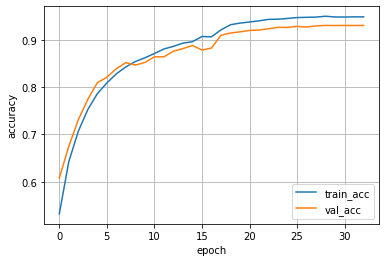

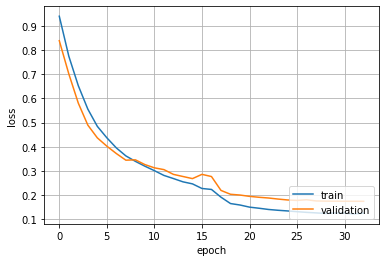

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
plt.plot(history_dict['acc'])
plt.plot(history_dict['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='lower right')
plt.grid(True)
plt.show()

plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid(True)
plt.show()

In [0]:
model2.save_weights('9304.h5')